In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix, ConfusionMatrixDisplay


# Specify the file path to the CSV file in Google Drive
file_path = "/content/drive/MyDrive/LoanData.csv"

# Load the CSV file into a pandas DataFrame, with low_memory set to False to avoid dtype warnings
data = pd.read_csv(file_path, low_memory=False)

# Set the option to display all rows in the DataFrame when printed
pd.set_option("display.max_rows", None)

# Set the option to display all columns in the DataFrame when printed
pd.set_option("display.max_columns", None)


In [77]:
# Diplay the first few lines of dataset to have an idea of what data looks like
display(data.head())

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,PartyId,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2024-07-11,D8EBF360-104C-420F-BEC9-000924E6EFC7,3015853,2022-09-09 12:27:01,2022-09-09 15:27:01,11,0.0,88.0,{1AD71AF0-8240-4700-B602-ADA90177DD8C},False,2022-09-09 15:15:03,2022-09-09,2025-10-27,2022-10-07,2027-09-07,2025-10-27,12,6,4.0,1,27,NaN,1.0,EE,3189.0,3189.0,35.48,60,115.34,NaN,NaN,-1,3.0,-1.0,NaN,-1.0,UpTo5Years,NaN,NaN,-1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,900.0,0,0.00,0,0.00,0.00,7,True,NaN,676.74,2024-07-07,NaN,NaN,NaN,NaN,0.106489,0.664726,0.136812,0.160200,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2024-07-07 18:32:24.180000000,6.0,D,NaN,NaN,NaN,NaN,NaN,Current,False,NaN,8-15,M,NaN,NaN,1000.0,1120.51,1571.8700,NaN,NaN,2068.49,0.000,1.0,3402.0,1161.57,NaN,0.0,NaN,NaN,2024-07-26,8.0,23.0,2023-11-30,NaN,NaN,NaN
1,2024-07-11,C1A98DDA-5E20-429C-BBFF-0009A05354E0,3743447,2023-05-19 11:04:33,2023-05-19 14:04:33,0,0.0,0.0,{3A9CF70B-0BD2-4ECE-8997-AF7F00D0EC5A},False,2023-05-19 14:03:54,2023-05-19,2033-06-27,2023-06-05,2028-05-03,2033-06-27,23,4,4.0,4,35,NaN,1.0,FI,4146.0,4146.0,19.86,60,108.17,NaN,NaN,-1,5.0,-1.0,NaN,-1.0,UpTo5Years,NaN,NaN,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3100.0,0,0.00,0,0.00,0.00,3,True,NaN,294.34,2024-01-26,135.0,2024-02-26,135.0,2024-02-26,0.030048,0.760044,0.138239,0.039534,2024-05-29,63.59,13.13,58.3205,3873.66,3353.81,0.00,0.0,2.0,2024-06-10 00:00:00,0.0,B,NaN,NaN,NaN,NaN,NaN,Late,True,121-150,121-150,M,NaN,3,NaN,272.34,493.8575,NaN,NaN,3873.66,235.239,1.0,518.0,525.21,NaN,0.0,NaN,NaN,NaN,0.0,120.0,2023-07-20,NaN,NaN,151-180
2,2024-07-11,9B0B252E-45B9-4172-8E2D-0014A8F18117,4335414,2024-02-03 14:43:32,2024-02-03 16:43:32,0,0.0,0.0,{FBC12A4E-7A50-4906-8C57-AFA2010015C5},False,2024-02-03 16:41:51,2024-02-03,2034-06-07,2024-02-23,2029-01-23,2034-06-07,17,6,4.0,1,23,NaN,0.0,EE,531.0,531.0,19.52,60,15.25,NaN,NaN,-1,5.0,-1.0,NaN,-1.0,UpTo5Years,NaN,NaN,-1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1700.0,0,0.00,0,0.00,0.00,23,True,NaN,1.45,2024-07-09,NaN,NaN,NaN,NaN,0.043995,0.714607,0.132462,0.061565,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2024-07-09 19:10:37.050000000,0.0,B,N

In [78]:
# See number of rows and columns in the dataset
display(data.shape)

(413332, 112)

In [79]:
display(data.describe())

,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentPosition,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,PlannedPrincipalTillDate,PlannedInterestTillDate,CurrentDebtDaysPrimary,CurrentDebtDaysSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,ModelVersion,EL_V0,EL_V1,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost
count,4.133320e+05,413332.000000,413332.000000,413332.000000,413332.000000,413332.000000,413282.000000,413332.000000,413332.000000,0.0,413287.000000,413332.000000,413332.000000,413332.000000,413332.000000,406642.000000,0.0,0.0,413332.000000,413282.000000,413282.000000,413130.000000,0.0,413241.000000,411675.000000,413332.000000,413332.000000,413332.000000,413332.000000,413332.000000,413332.000000,413332.000000,4.133320e+05,413332.000000,4.133320e+05,413332.000000,413282.000000,413282.000000,413332.000000,54464.000000,403274.000000,142605.000000,153625.000000,410693.000000,410693.000000,410693.000000,410693.000000,398463.000000,127453.000000,127453.000000,128125.000000,128125.000000,127453.000000,127453.000000,237478.000000,410693.000000,4569.000000,12924.000000,171496.000000,413332.000000,413332.000000,116729.000000,116729.000000,413332.000000,174042.000000,413319.000000,413319.000000,256036.000000,63055.000000,413319.000000,223724.000000,223724.000000,116729.000000,116729.000000
mean,2.562547e+06,368.520748,13.930558,235.673913,13.447664,3.979331,3.556426,3.475143,40.314868,NaN,0.481900,2552.233654,2484.736306,26.557718,49.978192,94.362699,NaN,NaN,-0.562804,3.325727,-0.710118,-0.624861,NaN,-0.225140,3.156009,142.278997,6.119798,1.849622,0.777886,1.058846,0.767840,14.032123,2.174907e+03,2.710485,4.019359e+02,0.060966,2.528079,39.777212,11.311539,994.588166,1145.393023,1140.443813,1127.291509,0.099642,0.589767,0.111942,0.157321,304.459714,1392.886899,1540.884383,2440.859716,1886.459265,567.204155,5.261167,1.444656,3.931691,0.192519,0.186722,943.264001,1141.836104,555.621096,287.399736,599.878498,1256.863996,939.214125,1.985464,3849.009261,1187.213777,558.693627,0.047143,5.563167,73.397955,17.287545,291.931201
std,1.367805e+06,900.709333,98.673746,540.592058,5.009142,1.808505,1.039025,3.090863,12.171550,NaN,0.575739,2113.102240,2033.721124,17.674543,18.220778,90.693301,NaN,NaN,1.991606,1.467039,0.980535,1.231488,NaN,2.998838,2.750695,1039.619004,86.509742,22.060526,21.019310,44.253743,16.274051,262.684855,9.307133e+03,3.009881,1.932601e+04,0.518906,9.963877,399.149700,7.298921,1654.995733,1668.359673,927.289057,958.717385,0.082684,0.269889,0.055989,0.122013,911.005475,1715.024813,2212.866982,1982.842569,1855.709828,992.659506,105.493174,0.595394,7.640416,0.187765,0.170872,109.896663,1561.374085,973.775860,874.774910,2858.410620,1680.857143,2965.990886,3.200588,5666.402917,1893.549441,1981.568272,0.336771,8.149436,33.541975,105.644438,495.570024
min,3.700000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,NaN,0.000000,10.000000,6.390000,2.000000,1.000000,0.000000,NaN,NaN,-1.000000,-1.000000,-1

In [80]:
# Check various data types in the data
display(data.dtypes)

,0
ReportAsOfEOD,object
LoanId,object
LoanNumber,int64
ListedOnUTC,object
BiddingStartedOn,object
BidsPortfolioManager,int64
BidsApi,float64
BidsManual,float64
PartyId,object
NewCreditCustomer,bool


In [81]:
# List names of all columns for inpsection
columns_list = data.columns.to_list()
columns_list.sort()
for index, column in enumerate(columns_list,):
    print(f"{index}: {column}")

# Display the columns of the DataFrame
print("Columns after sorting alphabetically:", columns_list)

0: ActiveLateCategory
1: ActiveLateLastPaymentCategory
2: ActiveScheduleFirstPaymentReached
3: Age
4: Amount
5: AmountOfPreviousLoansBeforeLoan
6: ApplicationSignedHour
7: ApplicationSignedWeekday
8: AppliedAmount
9: BiddingStartedOn
10: BidsApi
11: BidsManual
12: BidsPortfolioManager
13: City
14: ContractEndDate
15: Country
16: County
17: CreditScoreEeMini
18: CreditScoreEsEquifaxRisk
19: CreditScoreEsMicroL
20: CreditScoreFiAsiakasTietoRiskGrade
21: CurrentDebtDaysPrimary
22: CurrentDebtDaysSecondary
23: DateOfBirth
24: DebtOccuredOn
25: DebtOccuredOnForSecondary
26: DebtToIncome
27: DefaultDate
28: EAD1
29: EAD2
30: EL_V0
31: EL_V1
32: Education
33: EmploymentDurationCurrentEmployer
34: EmploymentPosition
35: EmploymentStatus
36: ExistingLiabilities
37: ExpectedLoss
38: ExpectedReturn
39: FirstPaymentDate
40: FreeCash
41: Gender
42: GracePeriodEnd
43: GracePeriodStart
44: HomeOwnershipType
45: IncomeFromChildSupport
46: IncomeFromFamilyAllowance
47: IncomeFromLeavePay
48: IncomeFrom

Let us view the total loan amount given

In [82]:
total_loan_amount = data["Amount"].sum()
print(f"Total loan amount: {total_loan_amount}")

Total loan amount: 1027021027.0119


Let us visualise some personal information like age and homeownership

AgeGroup
0-4         53
5-9          0
10-14        0
15-19     3197
20-24    32915
25-29    51752
30-34    64370
35-39    62476
40-44    54462
45-49    45128
50-54    36278
55-59    28905
60-64    20116
65-69    12387
70-74     1286
75-79        7
Name: count, dtype: int64


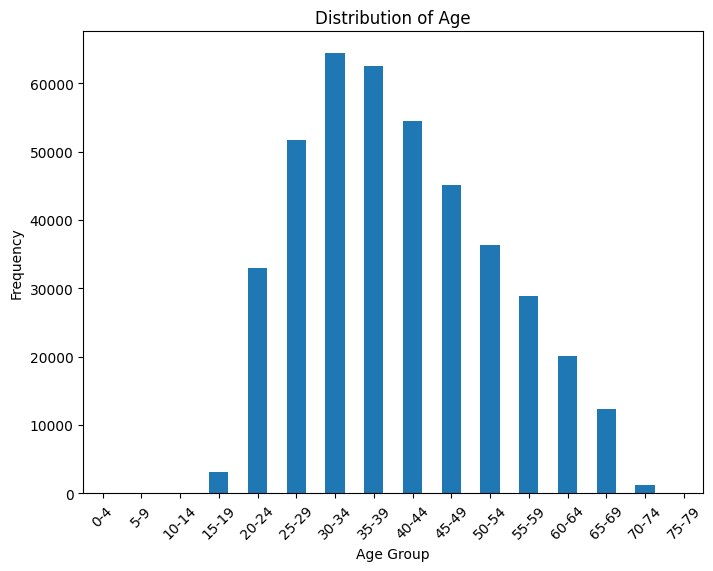

In [83]:
# Create age bins with intervals of 5
bins = range(0, data['Age'].max() + 5, 5)
labels = [f'{i}-{i+4}' for i in bins[:-1]]
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Get the count of each age grouping
age_group_counts = data['AgeGroup'].value_counts().sort_index()
print(age_group_counts)

# Plot the distribution of age groups
plt.figure(figsize=(8, 6))
data['AgeGroup'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Age')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [84]:
age_less_than_18 = data[data["Age"] < 18]
print(age_less_than_18.shape)

(53, 113)


Let us also visualise by home ownership

HomeOwnershipType
 1.0     151968
 3.0     138482
 2.0      44691
 10.0     32759
 8.0      30126
 4.0       4603
 7.0       3346
 5.0       3120
 6.0       1620
 9.0        745
 0.0        212
-1.0          3
Name: count, dtype: int64


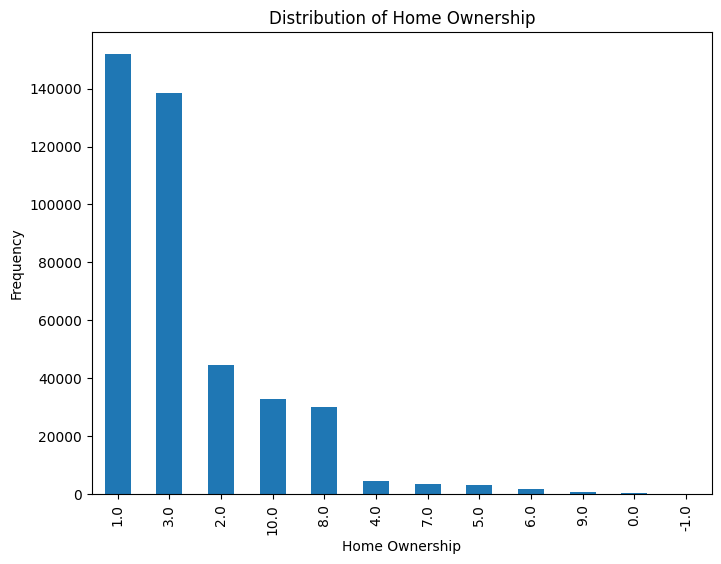

In [85]:
print(data["HomeOwnershipType"].value_counts())
plt.figure(figsize=(8, 6))
data['HomeOwnershipType'].value_counts().plot(kind='bar')
plt.title('Distribution of Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')
plt.show()

Let us see what the gender distribution looks like to

Gender
0.0    231028
1.0    165355
2.0     16904
Name: count, dtype: int64


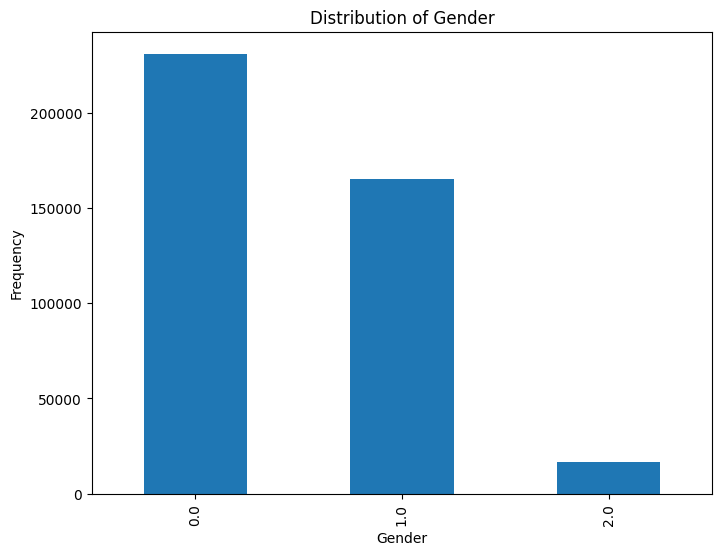

In [86]:
print(data["Gender"].value_counts())
plt.figure(figsize=(8,6))
data["Gender"].value_counts().plot(kind="bar")
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

Let us see the Status columns to see the statistics of each category

In [87]:
print(data["Status"].value_counts(normalize = True))

Status
Repaid     0.390018
Current    0.342659
Late       0.267323
Name: proportion, dtype: float64


Create a deep copy of the original dataset 'data' and assign it to 'full_loan'.
This ensures that any modifications made to 'full_loan' will not affect the original 'data' DataFrame.

In [88]:
full_loan = data.copy()

We will create a new columns named "loan_default" which will be our target feature by encoding "DefaultDate" feature into 0 and 1 first where NaN columns will be 0 which represent "not defaulted and columns with default dates will be 1 which represent

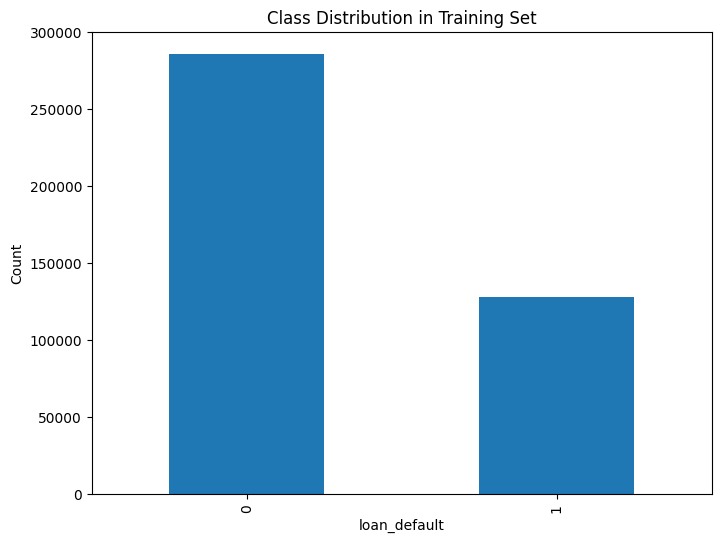

(413332, 114)

loan_default
0    285852
1    127480
Name: count, dtype: int64


In [89]:
# Create a new column 'loan_default' that will be our target variable
full_loan.loc[:, 'loan_default'] = np.where(full_loan['DefaultDate'].notna(), 1, 0)

# Creating X and y variables by separating the loan_default column from the rest of the data
# Now 'loan_default' is your target variable
y = full_loan['loan_default']
X = full_loan.drop('loan_default', axis=1)
plt.figure(figsize=(8, 6))
y.value_counts().plot(kind='bar')
plt.title('Class Distribution in Training Set')
plt.xlabel('loan_default')
plt.ylabel('Count')
plt.show()
display(full_loan.shape)
print(y.value_counts())

We will be splitting our data into Training, Validation and Test data before performing any cleaning

In [90]:
# First, split off the test set
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# Then split the remaining data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=2024)  # 0.25 x 0.8 = 0.2

# Print the shapes of the training, validation, and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)

print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (247998, 113)
Shape of y_train: (247998,)
Shape of X_val: (82667, 113)
Shape of y_val: (82667,)
Shape of X_test: (82667, 113)
Shape of y_test: (82667,)


In [91]:
# # Perform cleaning only on the training data
# full_loan = X_train.copy()

We will be working with entries from 2009 to 2022, however, let us check the range year range of the data available now. However, let us first select a very few interesting columns in the data that gives information about data and the loan status to inspect

In [92]:
# Construct new Dataframe with selected features from inpection sake
interesting_features = X_train[["LoanDate", "DefaultDate", "Status",	"Restructured", "GracePeriodStart","LoanDuration","ContractEndDate","FirstPaymentDate", "MaturityDate_Original","Amount"]]
display(interesting_features.head(20))

,LoanDate,DefaultDate,Status,Restructured,GracePeriodStart,LoanDuration,ContractEndDate,FirstPaymentDate,MaturityDate_Original,Amount
55855,2018-02-22,NaN,Repaid,False,NaN,24,2020-03-10,2018-04-10,2020-03-10,2870.0
303698,2023-05-16,NaN,Current,True,2024-02-01,12,NaN,2023-05-24,2024-04-24,4146.0
173324,2021-05-12,2023-09-05,Late,False,NaN,60,NaN,2021-06-02,2026-05-04,4150.0
162943,2021-01-25,2021-10-18,Late,True,2021-05-11,60,2026-05-15,2021-02-11,2026-01-12,4253.0
288235,2023-03-10,NaN,Late,True,NaN,60,NaN,2023-04-10,2028-03-10,6911.0
259828,2022-10-07,NaN,Current,True,2024-05-15,36,NaN,2022-11-10,2025-10-10,106.0
347527,2023-12-17,NaN,Current,False,NaN,60,NaN,2024-01-19,2028-12-19,531.0
328758,2023-09-28,NaN,Current,True,NaN,60,NaN,2023-10-17,2028-09-18,4146.0
310599,2023-06-21,NaN,Current,True,NaN,60,NaN,2023-06-27,2028-05-26,106.0
3261,2023-02-16,NaN,Repaid,False,NaN,60,NaN,2023-03-15,2028-02-15,850.0


In [93]:
# Convert LoanDate column data type to datatime inorder to filter it
pd.to_datetime(X_train["LoanDate"])
min_max_date = X_train["LoanDate"].aggregate(["min", "max"])
display(min_max_date)

,LoanDate
min,2009-03-01
max,2024-07-11


The data ranges from 2009-02-28 to 2004-07-11. All rows from 2023 will be dropped.

In [94]:
# Ensuring dataset contains only data up to 2022
X_train_filtered_by_date = X_train[X_train["LoanDate"] < "2023-01-01"]
# Apply the same filter to y_train using the index of the filtered X_train
y_train_filtered_by_date = y_train[X_train["LoanDate"] < "2023-01-01"]

# Filter X_val based on the LoanDate condition
X_val_filtered_by_date = X_val[X_val["LoanDate"] < "2023-01-01"]
# Apply the same filter to y_val to maintain alignment
y_val_filtered_by_date = y_val[X_val["LoanDate"] < "2023-01-01"]

# Filter X_test based on the LoanDate condition
X_test_filtered_by_date = X_test[X_test["LoanDate"] < "2023-01-01"]
# Apply the same filter to y_test to maintain alignment
y_test_filtered_by_date = y_test[X_test["LoanDate"] < "2023-01-01"]


# Aggregating the minimum and maximum dates to verify the date range in the filtered dataset
min_max_date = X_train_filtered_by_date["LoanDate"].aggregate(["min", "max"])
print(f'The date range of data in the dataset is {min_max_date}')

# Print the shapes of the filtered datasets
print("Shape of X_train_filtered_by_date:", X_train_filtered_by_date.shape)
print("Shape of y_train_filtered_by_date:", y_train_filtered_by_date.shape)
print("Shape of X_val_filtered_by_date:", X_val_filtered_by_date.shape)
print("Shape of y_val_filtered_by_date:", y_val_filtered_by_date.shape)
print("Shape of X_test_filtered_by_date:", X_test_filtered_by_date.shape)
print("Shape of y_test_filtered_by_date:", y_test_filtered_by_date.shape)


The date range of data in the dataset is min    2009-03-01
max    2022-12-31
Name: LoanDate, dtype: object
Shape of X_train_filtered_by_date: (163443, 113)
Shape of y_train_filtered_by_date: (163443,)
Shape of X_val_filtered_by_date: (54132, 113)
Shape of y_val_filtered_by_date: (54132,)
Shape of X_test_filtered_by_date: (54380, 113)
Shape of y_test_filtered_by_date: (54380,)


We will only be predicting with loans that have either defaulted or been repaid, so we will drop the "Current" category.

In [95]:
# Remove rows with "Status" as "Current"
X_train_filtered_date_status = X_train_filtered_by_date.loc[X_train_filtered_by_date["Status"] != "Current"]
# Apply the same filter to y_train to maintain alignment
y_train_filtered_date_status = y_train_filtered_by_date[X_train_filtered_by_date["Status"] != "Current"]

# Filter X_val to remove rows with "Status" as "Current"
X_val_filtered_date_status = X_val_filtered_by_date.loc[X_val_filtered_by_date["Status"] != "Current"]
# Apply the same filter to y_val to maintain alignment
y_val_filtered_date_status = y_val_filtered_by_date[X_val_filtered_by_date["Status"] != "Current"]

# Filter X_test to remove rows with "Status" as "Current"
X_test_filtered_date_status = X_test_filtered_by_date.loc[X_test_filtered_by_date["Status"] != "Current"]
# Apply the same filter to y_test to maintain alignment
y_test_filtered_date_status = y_test_filtered_by_date[X_test_filtered_by_date["Status"] != "Current"]



# Print the shapes of the filtered datasets
print("Shape of X_train_filtered_date_status:", X_train_filtered_date_status.shape)
print("Shape of y_train_filtered_date_status:", y_train_filtered_date_status.shape)
print("Shape of X_val_filtered_date_status:", X_val_filtered_date_status.shape)
print("Shape of y_val_filtered_date_status:", y_val_filtered_date_status.shape)
print("Shape of X_test_filtered_date_status:", X_test_filtered_date_status.shape)
print("Shape of y_test_filtered_date_status:", y_test_filtered_date_status.shape)

Shape of X_train_filtered_date_status: (135360, 113)
Shape of y_train_filtered_date_status: (135360,)
Shape of X_val_filtered_date_status: (44903, 113)
Shape of y_val_filtered_date_status: (44903,)
Shape of X_test_filtered_date_status: (45075, 113)
Shape of y_test_filtered_date_status: (45075,)


In [96]:
dtypes_sorted = X_train_filtered_date_status.dtypes.sort_index()

# Print each column name and its data type on a new line
for column, dtype in dtypes_sorted.items():
    print(f"{column}: {dtype}")

ActiveLateCategory: object
ActiveLateLastPaymentCategory: object
ActiveScheduleFirstPaymentReached: bool
Age: int64
AgeGroup: category
Amount: float64
AmountOfPreviousLoansBeforeLoan: float64
ApplicationSignedHour: int64
ApplicationSignedWeekday: int64
AppliedAmount: float64
BiddingStartedOn: object
BidsApi: float64
BidsManual: float64
BidsPortfolioManager: int64
City: float64
ContractEndDate: object
Country: object
County: float64
CreditScoreEeMini: float64
CreditScoreEsEquifaxRisk: object
CreditScoreEsMicroL: object
CreditScoreFiAsiakasTietoRiskGrade: object
CurrentDebtDaysPrimary: float64
CurrentDebtDaysSecondary: float64
DateOfBirth: float64
DebtOccuredOn: object
DebtOccuredOnForSecondary: object
DebtToIncome: float64
DefaultDate: object
EAD1: float64
EAD2: float64
EL_V0: float64
EL_V1: float64
Education: float64
EmploymentDurationCurrentEmployer: object
EmploymentPosition: float64
EmploymentStatus: float64
ExistingLiabilities: int64
ExpectedLoss: float64
ExpectedReturn: float64
Fi

1. Let us check the percentage of missing value in each column
2.We will be dropping colums where missing values are above 40%.


In [97]:
# Lets check number the percentage of missing values in each columns
missing_values = X_train_filtered_date_status.isna().mean()*100
display(missing_values)

,0
ReportAsOfEOD,0.000000
LoanId,0.000000
LoanNumber,0.000000
ListedOnUTC,0.000000
BiddingStartedOn,0.000000
BidsPortfolioManager,0.000000
BidsApi,0.000000
BidsManual,0.000000
PartyId,0.000000
NewCreditCustomer,0.000000


In [98]:
# Calculate the threshold for missing values (40% of the total number of rows)
threshold = 0.4 * len(X_train_filtered_date_status)

# Identify columns where the number of missing values is greater than or equal to the threshold
columns_to_drop = X_train_filtered_date_status.columns[
    X_train_filtered_date_status.isnull().sum() >= threshold
].tolist()


# Print the columns that will be dropped
print("Columns to be dropped:")
for index, column in enumerate(columns_to_drop,1):
  print(f'{index}:{column}')

Columns to be dropped:
1:ContractEndDate
2:DateOfBirth
3:County
4:City
5:NrOfDependants
6:EmploymentPosition
7:WorkExperience
8:PlannedPrincipalTillDate
9:CurrentDebtDaysPrimary
10:DebtOccuredOn
11:CurrentDebtDaysSecondary
12:DebtOccuredOnForSecondary
13:DefaultDate
14:PlannedPrincipalPostDefault
15:PlannedInterestPostDefault
16:EAD1
17:EAD2
18:PrincipalRecovery
19:InterestRecovery
20:EL_V0
21:Rating_V0
22:EL_V1
23:Rating_V1
24:Rating_V2
25:ActiveLateCategory
26:CreditScoreEsEquifaxRisk
27:CreditScoreFiAsiakasTietoRiskGrade
28:CreditScoreEeMini
29:PrincipalWriteOffs
30:InterestAndPenaltyWriteOffs
31:PreviousEarlyRepaymentsBefoleLoan
32:GracePeriodStart
33:GracePeriodEnd
34:NextPaymentDate
35:NextPaymentNr
36:NrOfScheduledPayments
37:ReScheduledOn
38:PrincipalDebtServicingCost
39:InterestAndPenaltyDebtServicingCost
40:ActiveLateLastPaymentCategory


In [99]:
# Drop all columns with missing values over 40%
X_train_filtered_date_status = X_train_filtered_date_status.drop(columns=columns_to_drop)

# Drop the same columns from the validation dataset
X_val_filtered_date_status = X_val_filtered_date_status.drop(columns=columns_to_drop, errors="ignore")

# Drop the same columns from the test dataset
X_test_filtered_date_status = X_test_filtered_date_status.drop(columns=columns_to_drop, errors="ignore")

# Print the shapes of the datasets after dropping the columns
print("Shape of X_train_filtered_date_status after dropping columns:", X_train_filtered_date_status.shape)
print("Shape of X_val_filtered_date_status after dropping columns:", X_val_filtered_date_status.shape)
print("Shape of X_test_filtered_date_status after dropping columns:", X_test_filtered_date_status.shape)

Shape of X_train_filtered_date_status after dropping columns: (135360, 73)
Shape of X_val_filtered_date_status after dropping columns: (44903, 73)
Shape of X_test_filtered_date_status after dropping columns: (45075, 73)


Let us see the data types of remaining columns

In [100]:
dtypes_sorted = X_train_filtered_date_status.dtypes.sort_index()

# Print each column name and its data type on a new line
print("Data types of Remaining columns:")
for column, dtype in dtypes_sorted.items():
    print(f"{column}: {dtype}")

Data types of Remaining columns:
ActiveScheduleFirstPaymentReached: bool
Age: int64
AgeGroup: category
Amount: float64
AmountOfPreviousLoansBeforeLoan: float64
ApplicationSignedHour: int64
ApplicationSignedWeekday: int64
AppliedAmount: float64
BiddingStartedOn: object
BidsApi: float64
BidsManual: float64
BidsPortfolioManager: int64
Country: object
CreditScoreEsMicroL: object
DebtToIncome: float64
Education: float64
EmploymentDurationCurrentEmployer: object
EmploymentStatus: float64
ExistingLiabilities: int64
ExpectedLoss: float64
ExpectedReturn: float64
FirstPaymentDate: object
FreeCash: float64
Gender: float64
HomeOwnershipType: float64
IncomeFromChildSupport: float64
IncomeFromFamilyAllowance: float64
IncomeFromLeavePay: float64
IncomeFromPension: float64
IncomeFromPrincipalEmployer: float64
IncomeFromSocialWelfare: float64
IncomeOther: float64
IncomeTotal: float64
Interest: float64
InterestAndPenaltyBalance: float64
InterestAndPenaltyPaymentsMade: float64
LanguageCode: int64
LastPay

In [101]:
# Select numerical and categorical columns from X_train_filtered_date_status
numerical_columns = X_train_filtered_date_status.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X_train_filtered_date_status.select_dtypes(include=['object']).columns

# Sort both sets of columns for easy inspection
numerical_columns_sorted = sorted(numerical_columns)
categorical_columns_sorted = sorted(categorical_columns)

# Print numerical columns with index
print("Numerical Columns")
for index, column in enumerate(numerical_columns_sorted, 1):
    print(f'{index}: {column}')

# Add a blank line for spacing
print()

# Print categorical columns with index
print("Categorical Columns")
for index, column in enumerate(categorical_columns_sorted, 1):
    print(f'{index}: {column}')


Numerical Columns
1: Age
2: Amount
3: AmountOfPreviousLoansBeforeLoan
4: ApplicationSignedHour
5: ApplicationSignedWeekday
6: AppliedAmount
7: BidsApi
8: BidsManual
9: BidsPortfolioManager
10: DebtToIncome
11: Education
12: EmploymentStatus
13: ExistingLiabilities
14: ExpectedLoss
15: ExpectedReturn
16: FreeCash
17: Gender
18: HomeOwnershipType
19: IncomeFromChildSupport
20: IncomeFromFamilyAllowance
21: IncomeFromLeavePay
22: IncomeFromPension
23: IncomeFromPrincipalEmployer
24: IncomeFromSocialWelfare
25: IncomeOther
26: IncomeTotal
27: Interest
28: InterestAndPenaltyBalance
29: InterestAndPenaltyPaymentsMade
30: LanguageCode
31: LiabilitiesTotal
32: LoanDuration
33: LoanNumber
34: LossGivenDefault
35: MaritalStatus
36: ModelVersion
37: MonthlyPayment
38: MonthlyPaymentDay
39: NoOfPreviousLoansBeforeLoan
40: OccupationArea
41: PlannedInterestTillDate
42: PreviousEarlyRepaymentsCountBeforeLoan
43: PreviousRepaymentsBeforeLoan
44: PrincipalBalance
45: PrincipalOverdueBySchedule
46: Pri

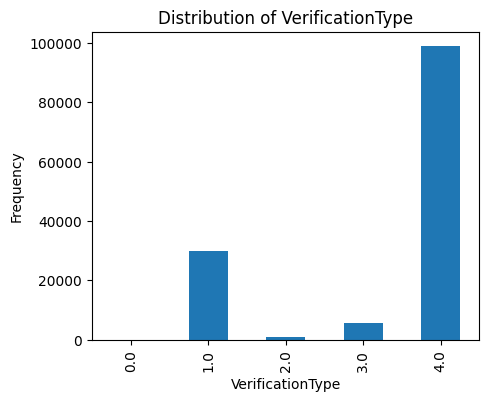

VerificationType
0.0        6
1.0    29899
2.0     1075
3.0     5555
4.0    98793
Name: count, dtype: int64


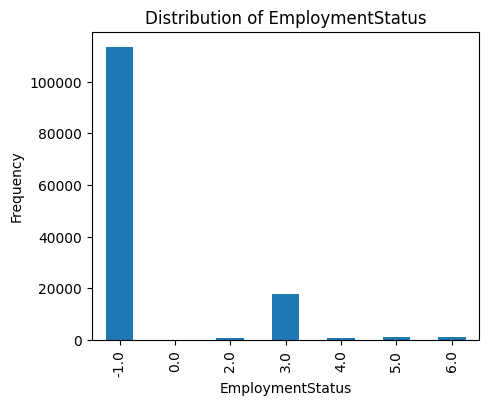

EmploymentStatus
-1.0    113701
 0.0        20
 2.0       742
 3.0     17760
 4.0       773
 5.0      1158
 6.0      1085
Name: count, dtype: int64


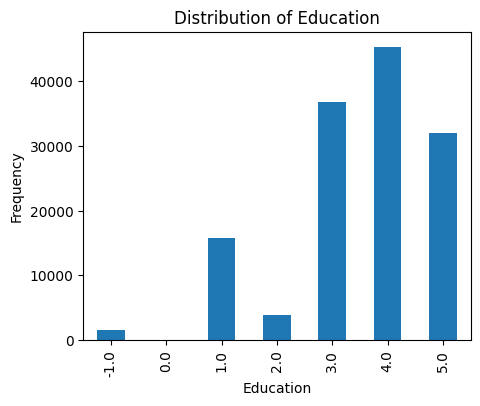

Education
-1.0     1515
 0.0        6
 1.0    15746
 2.0     3827
 3.0    36768
 4.0    45407
 5.0    32059
Name: count, dtype: int64


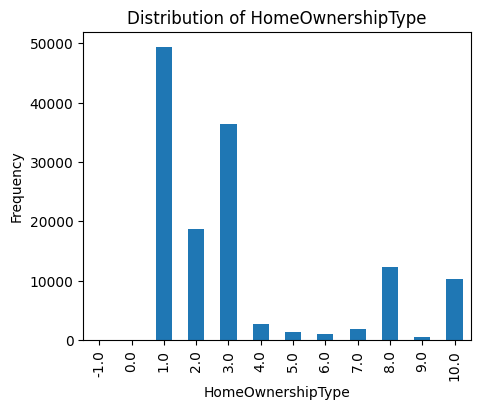

HomeOwnershipType
-1.0         2
 0.0        52
 1.0     49458
 2.0     18637
 3.0     36350
 4.0      2719
 5.0      1262
 6.0       942
 7.0      1888
 8.0     12316
 9.0       443
 10.0    10299
Name: count, dtype: int64


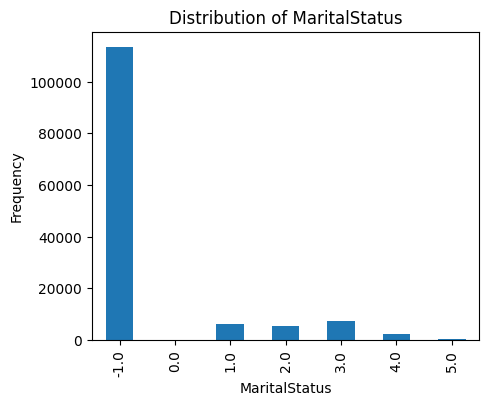

MaritalStatus
-1.0    113701
 0.0         6
 1.0      6267
 2.0      5488
 3.0      7440
 4.0      2074
 5.0       352
Name: count, dtype: int64


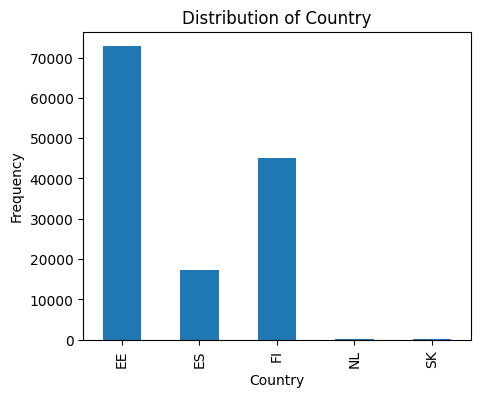

Country
EE    72797
ES    17222
FI    45077
NL       85
SK      179
Name: count, dtype: int64


In [102]:
# Define the columns to investigate
columns_to_investigate = ['VerificationType', 'EmploymentStatus', 'Education', 'HomeOwnershipType', 'MaritalStatus', 'Country'] #"FreeCash"

for column in columns_to_investigate:
    plt.figure(figsize=(5, 4))

    # Sort the value counts from X_train_filtered_date_status
    value_counts = X_train_filtered_date_status[column].value_counts().sort_index()

    # Plot the distribution
    value_counts.plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # Print the value counts
    print(value_counts)

Let us investigate some Numeric data

There are no duplicate rows in the dataframe


In [103]:
# Check for any duplicate rows in the training set
duplicate_rows_train = X_train_filtered_date_status[X_train_filtered_date_status.duplicated()]
print(f"Number of duplicate rows in the training set: {len(duplicate_rows_train)}")

Number of duplicate rows in the training set: 0


From inspection of the graph and value count, we will discover
1. Marital status have 189327 negative values so those rows will be dropped
2. Freecash has some negative values and 191555 "0" entries so the columns is not informative and will be dropped
3. Education has some "0" value and 2477 "-1" which is uninformative
4. Employment Status has 189327 "-1" value which is uninformative
5. Verification Type column has only 8 value with "0" which will be dropped
6. Home ownership column is okay and has only 3 "-1" value
7. Drop rows where age is less than 18 years
8. The distribution count of loans in "Slovekia" is below 300, so we will remove entries from Solvekia.

In [104]:
# Identify rows to drop based on various conditions for the training set
marital_status_drop_train = X_train_filtered_date_status['MaritalStatus'] == -1
verification_type_drop_train = X_train_filtered_date_status['VerificationType'] == 0
home_ownership_drop_train = X_train_filtered_date_status['HomeOwnershipType'] <= 0
education_drop_train = X_train_filtered_date_status['Education'] == -1
employment_status_drop_train = X_train_filtered_date_status['EmploymentStatus'] == -1
age_less_than_18_train = X_train_filtered_date_status["Age"] < 18
country_drop_train = X_train_filtered_date_status["Country"] == "SK"

# Combine all conditions to create a mask for rows to drop in the training set
rows_to_drop_train = (
    marital_status_drop_train |
    verification_type_drop_train |
    home_ownership_drop_train |
    education_drop_train |
    employment_status_drop_train |
    age_less_than_18_train |
    country_drop_train
)

# Drop the rows from X_train_filtered_date_status and y_train
X_train_cleaned = X_train_filtered_date_status[~rows_to_drop_train]

# Align y_train with X_train_filtered_date_status before dropping rows
y_train_aligned = y_train.loc[X_train_filtered_date_status.index]  # Align indices
y_train_cleaned = y_train_aligned[~rows_to_drop_train]  # Now drop rows

# For Validation Set:
# Identify rows to drop based on the same conditions for the validation set
marital_status_drop_val = X_val_filtered_date_status['MaritalStatus'] == -1
verification_type_drop_val = X_val_filtered_date_status['VerificationType'] == 0
home_ownership_drop_val = X_val_filtered_date_status['HomeOwnershipType'] <= 0
education_drop_val = X_val_filtered_date_status['Education'] == -1
employment_status_drop_val = X_val_filtered_date_status['EmploymentStatus'] == -1
age_less_than_18_val = X_val_filtered_date_status["Age"] < 18
country_drop_val = X_val_filtered_date_status["Country"] == "SK"

# Combine all conditions to create a mask for rows to drop in the validation set
rows_to_drop_val = (
    marital_status_drop_val |
    verification_type_drop_val |
    home_ownership_drop_val |
    education_drop_val |
    employment_status_drop_val |
    age_less_than_18_val |
    country_drop_val
)

# Drop the rows from X_val_filtered_date_status and y_val
X_val_cleaned = X_val_filtered_date_status[~rows_to_drop_val]

# Align y_val with X_val_filtered_date_status before dropping rows
y_val_aligned = y_val.loc[X_val_filtered_date_status.index]  # Align indices
y_val_cleaned = y_val_aligned[~rows_to_drop_val]  # Now drop rows

# For Test Set:
# Identify rows to drop based on the same conditions for the test set
marital_status_drop_test = X_test_filtered_date_status['MaritalStatus'] == -1
verification_type_drop_test = X_test_filtered_date_status['VerificationType'] == 0
home_ownership_drop_test = X_test_filtered_date_status['HomeOwnershipType'] <= 0
education_drop_test = X_test_filtered_date_status['Education'] == -1
employment_status_drop_test = X_test_filtered_date_status['EmploymentStatus'] == -1
age_less_than_18_test = X_test_filtered_date_status["Age"] < 18
country_drop_test = X_test_filtered_date_status["Country"] == "SK"

# Combine all conditions to create a mask for rows to drop in the test set
rows_to_drop_test = (
    marital_status_drop_test |
    verification_type_drop_test |
    home_ownership_drop_test |
    education_drop_test |
    employment_status_drop_test |
    age_less_than_18_test |
    country_drop_test
)

# Drop the rows from X_test_filtered_date_status and y_test
X_test_cleaned = X_test_filtered_date_status[~rows_to_drop_test]

# Align y_test with X_test_filtered_date_status before dropping rows
y_test_aligned = y_test.loc[X_test_filtered_date_status.index]  # Align indices
y_test_cleaned = y_test_aligned[~rows_to_drop_test]  # Now drop rows

# Print the shapes of the cleaned datasets to verify
print("Shape of X_train_cleaned:", X_train_cleaned.shape)
print("Shape of y_train_cleaned:", y_train_cleaned.shape)
print("Shape of X_val_cleaned:", X_val_cleaned.shape)
print("Shape of y_val_cleaned:", y_val_cleaned.shape)
print("Shape of X_test_cleaned:", X_test_cleaned.shape)
print("Shape of y_test_cleaned:", y_test_cleaned.shape)

Shape of X_train_cleaned: (21424, 73)
Shape of y_train_cleaned: (21424,)
Shape of X_val_cleaned: (7052, 73)
Shape of y_val_cleaned: (7052,)
Shape of X_test_cleaned: (7148, 73)
Shape of y_test_cleaned: (7148,)


1. Some columns are specifically about the company and give no information about the loan so they will be dropped. Columns like BiddingStartedOn, BidsApi BidsManual BidsPortfolioManager also LoanId, LoanNumber and PartyId columns

2. let us drop columns that give information about dates as LoanDuration column already give similar information;  LoanDate, MonthlyPaymentDay, LoanApplicationStartedDate, ListedOnUTC, MaturityDate_Last, ContractEndDate, MaturityDate_Original, FirstPaymentDate, ReportAsOfEOD

3. Since we already have IncomeTotal which is a summation of all other income, let us drop all other income columns.

In [105]:
# List of columns to be dropped from the DataFrame
features_to_drop = ['BiddingStartedOn', 'BidsApi', 'BidsManual', 'BidsPortfolioManager',
                    'LoanId', 'LoanNumber', 'PartyId', 'ModelVersion']

# Drop the specified columns from the training, validation, and test sets
X_train_cleaned = X_train_cleaned.drop(columns=features_to_drop, errors="ignore")
X_val_cleaned = X_val_cleaned.drop(columns=features_to_drop, errors="ignore")
X_test_cleaned = X_test_cleaned.drop(columns=features_to_drop, errors="ignore")

# Print the shape of the cleaned datasets to verify
print("Shape of X_train_cleaned after dropping features:", X_train_cleaned.shape)
print("Shape of X_val_cleaned after dropping features:", X_val_cleaned.shape)
print("Shape of X_test_cleaned after dropping features:", X_test_cleaned.shape)


Shape of X_train_cleaned after dropping features: (21424, 65)
Shape of X_val_cleaned after dropping features: (7052, 65)
Shape of X_test_cleaned after dropping features: (7148, 65)



* Let us drop columns that give informations about date to reduce redundancy aince we already have LoanDuration columns and columns that give information post target variable to avoid data leakage.
 [
    "LoanDate", "MonthlyPaymentDay", "LoanApplicationStartedDate", "ListedOnUTC",
    "MaturityDate_Last", "ContractEndDate", "MaturityDate_Original", "FirstPaymentDate",
    "LastPaymentOn", "ReportAsOfEOD", "StageActiveSince", "ApplicationSignedHour",
    "ApplicationSignedWeekday", "Status", "Restructured", "WorseLateCategory",
    "RecoveryStage", "InterestAndPenaltyBalance", "InterestAndPenaltyPaymentsMade",
    "PrincipalOverdueBySchedule", "AppliedAmount"
]

In [106]:
# List of columns to drop
columns_to_drop = [
    "LoanDate", "MonthlyPaymentDay", "LoanApplicationStartedDate", "ListedOnUTC",
    "MaturityDate_Last", "ContractEndDate", "MaturityDate_Original", "FirstPaymentDate",
    "LastPaymentOn", "ReportAsOfEOD", "StageActiveSince", "ApplicationSignedHour",
    "ApplicationSignedWeekday", "Status", "Restructured", "WorseLateCategory",
    "RecoveryStage", "InterestAndPenaltyBalance", "InterestAndPenaltyPaymentsMade",
    "PrincipalOverdueBySchedule", "AppliedAmount"
]

# Drop the specified columns from the training, validation, and test sets
X_train_cleaned = X_train_cleaned.drop(columns=columns_to_drop, errors="ignore")
X_val_cleaned = X_val_cleaned.drop(columns=columns_to_drop, errors="ignore")
X_test_cleaned = X_test_cleaned.drop(columns=columns_to_drop, errors="ignore")

# Print the shapes of the cleaned datasets to verify
print("Shape of X_train_cleaned after dropping columns:", X_train_cleaned.shape)
print("Shape of X_val_cleaned after dropping columns:", X_val_cleaned.shape)
print("Shape of X_test_cleaned after dropping columns:", X_test_cleaned.shape)


Shape of X_train_cleaned after dropping columns: (21424, 45)
Shape of X_val_cleaned after dropping columns: (7052, 45)
Shape of X_test_cleaned after dropping columns: (7148, 45)


Let us drop all other column that sums up in the IncomeTotal column to avoid redundancy.
IncomeFromChildSupport,
IncomeFromFamilyAllowance,
IncomeFromLeavePay,
IncomeFromPension,
IncomeFromPrincipalEmployer,
IncomeFromSocialWelfare,
IncomeOther

In [107]:
# List of income-related columns to drop
income_columns_to_drop = [
    "IncomeFromChildSupport", "IncomeFromFamilyAllowance", "IncomeFromLeavePay",
    "IncomeFromPension", "IncomeFromPrincipalEmployer", "IncomeFromSocialWelfare",
    "IncomeOther", "FreeCash",
]

# Drop the specified income-related columns from the training, validation, and test sets
X_train_cleaned = X_train_cleaned.drop(columns=income_columns_to_drop, errors="ignore")
X_val_cleaned = X_val_cleaned.drop(columns=income_columns_to_drop, errors="ignore")
X_test_cleaned = X_test_cleaned.drop(columns=income_columns_to_drop, errors="ignore")

# Print the shapes of the cleaned datasets to verify
print("Shape of X_train_cleaned after dropping income-related columns:", X_train_cleaned.shape)
print("Shape of X_val_cleaned after dropping income-related columns:", X_val_cleaned.shape)
print("Shape of X_test_cleaned after dropping income-related columns:", X_test_cleaned.shape)


Shape of X_train_cleaned after dropping income-related columns: (21424, 37)
Shape of X_val_cleaned after dropping income-related columns: (7052, 37)
Shape of X_test_cleaned after dropping income-related columns: (7148, 37)


**Now, Let us try begin the pre-processing**
The following steps will be performed  using a transformer for compactness.
The independent variables will be defined along with the target variable.
Data imputation will be performed using median and the data scaled
RFE will be performed using XGBoost
Mutual information will be calculated
A function will be defined to train, predict and evaluate three models, XGBoost, RandomForest and AdaBoost.

In [108]:
# Identify numeric and categorical columns in the cleaned training data
numeric_features = X_train_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train_cleaned.select_dtypes(include=['object']).columns

# Create preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit the preprocessor on the training data and transform training, validation, and test sets
X_train_preprocessed = preprocessor.fit_transform(X_train_cleaned)
X_val_preprocessed = preprocessor.transform(X_val_cleaned)
X_test_preprocessed = preprocessor.transform(X_test_cleaned)

# Get feature names after preprocessing
feature_names = (numeric_features.tolist() +
                 preprocessor.named_transformers_['cat']
                 .named_steps['onehot']
                 .get_feature_names_out(categorical_features).tolist())

Before we continue, let us examine our target variable and check for imbalance

Class distribution in the training set before SMOTE:
loan_default
1    11905
0     9519
Name: count, dtype: int64


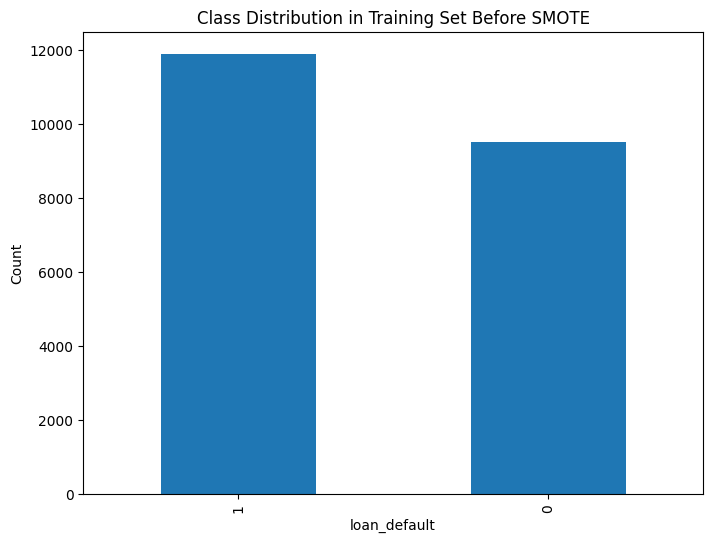

In [109]:
# Check the class distribution before applying SMOTE
print("Class distribution in the training set before SMOTE:")
print(y_train_cleaned.value_counts())

plt.figure(figsize=(8, 6))
y_train_cleaned.value_counts().plot(kind='bar')
plt.title('Class Distribution in Training Set Before SMOTE')
plt.xlabel('loan_default')
plt.ylabel('Count')
plt.show()

Our data has 11905 defaulted and 9519 Non- defaulted categories.
We used the figure to calculate the imabalance ratio and the result is 1.275 : 1 which is considered faily balanced.

However, we will apply SMOTE to balance the data just to slightly improve efficiency

In [110]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=2024)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train_cleaned)

# Check the class distribution after applying SMOTE
print("Class distribution in the training set after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution in the training set after SMOTE:
loan_default
1    11905
0    11905
Name: count, dtype: int64


Use a smaller subset of just 1000 entries for feature selection using RFE with Random Forest because of the computation time on the larger dataset.
Then Print the selected features

In [111]:
# Select a 1,000-row subset of the resampled dataset
X_train_subset, _, y_train_subset, _ = train_test_split(X_train_resampled, y_train_resampled,
                                                        train_size=1000, random_state=2024)

# Define the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=50, random_state=2024, n_jobs=-1)

# Perform RFE (Recursive Feature Elimination) with the Random Forest classifier
rfe_selector = RFE(estimator=rf_clf, n_features_to_select=15, step=5)
rfe_selector = rfe_selector.fit(X_train_subset, y_train_subset)

# Get RFE selected features
rfe_support = rfe_selector.support_
rfe_feature_names = [feature for feature, selected in zip(feature_names, rfe_support) if selected]
print("RFE Selected Features:", rfe_feature_names)

RFE Selected Features: ['Age', 'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment', 'IncomeTotal', 'LiabilitiesTotal', 'DebtToIncome', 'PlannedInterestTillDate', 'ExpectedLoss', 'ExpectedReturn', 'ProbabilityOfDefault', 'PrincipalPaymentsMade', 'PrincipalBalance', 'PreviousRepaymentsBeforeLoan']


Calculate Mutual information of features and selected the top 15 features
Print selected features

In [112]:
#  This is a Jupyter Notebook cell magic that suppresses the output
%%capture

# Calculate Mutual Information
mi_scores = mutual_info_classif(X_train_resampled, y_train_resampled)
mi_feature_names = [feature_names[i] for i in np.argsort(mi_scores)[-15:]]  # Top 15 features

In [113]:
print("Mutual Information Selected Features:", mi_feature_names)

Mutual Information Selected Features: ['Country_EE', 'OccupationArea', 'LanguageCode', 'LossGivenDefault', 'LoanDuration', 'MonthlyPayment', 'Age', 'ExistingLiabilities', 'Interest', 'ExpectedReturn', 'ExpectedLoss', 'ProbabilityOfDefault', 'PlannedInterestTillDate', 'PrincipalBalance', 'PrincipalPaymentsMade']


Defining a function to train models( RandomForest, XGBoost, AdaBoost) with hyparameters using grid_search

In [114]:
# Function to train and evaluate models with hyperparameter tuning
def train_and_evaluate_with_tuning(X_train, X_val, y_train, y_val, model_name):
    if model_name == 'RandomForest':
        model = RandomForestClassifier(random_state=2024, n_jobs=-1)
        param_grid = {
            'n_estimators': [150,250, 300, 400, 500,600],  # Number of trees
            'max_depth': [None,2,4,6],  # Control tree depth
            'min_samples_split': [2, 3,5,7]  # Minimum samples required to split

            # 'min_samples_leaf': [2, 4, 6],  # Minimum samples in leaf nodes
            # 'max_features': ['sqrt', 'log2', None]  # Number of features to consider at each split
        }
    elif model_name == 'XGBoost':
        model = XGBClassifier(random_state=2024, eval_metric='logloss')
        param_grid = {
            'n_estimators': [150,250, 300, 400, 500,600],  # Number of boosting rounds
            'max_depth': [2, 4, 6, 8],  # Maximum tree depth
            'learning_rate': [0.01, 0.05,0.2, 0.3]  # Learning rate

            # 'subsample': [0.8, 1.0],  # Fraction of data to sample for each tree
            # 'colsample_bytree': [0.8, 1.0],  # Fraction of features to sample for each tree
            # 'reg_alpha': [0, 0.1, 0.5],  # L1 regularization term
            # 'reg_lambda': [1, 1.5, 2]  # L2 regularization term
        }
    elif model_name == 'AdaBoost':
        model = AdaBoostClassifier(random_state=2024)
        param_grid = {
            'n_estimators': [100, 150, 200, 250],  # Number of boosting rounds
            'learning_rate': [0.01, 0.05, 0.1],
            'algorithm': ['SAMME.R']  # The boosting algorithm
        }

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_val)
    y_pred_proba = best_model.predict_proba(X_val)[:, 1]

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred_proba)

    return best_model, accuracy, precision, recall, f1, auc, grid_search.best_params_


# Dictionary to store results
results = {}


Train and Evaluate models with Features selected using RFE

In [115]:
# Train and evaluate models with RFE selected features
print("Results with RFE selected features:")
for model_name in ['RandomForest', 'XGBoost', 'AdaBoost']:
    model, accuracy, precision, recall, f1, auc, best_params = train_and_evaluate_with_tuning(
        X_train_resampled[:, rfe_support],
        X_val_preprocessed[:, rfe_support],
        y_train_resampled, y_val_cleaned, model_name
    )
    results[f"{model_name}_RFE"] = {
        "model": model,
        "metrics": {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "auc": auc
        },
        "params": best_params
    }
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, "
          f"Recall: {recall:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")
    print(f"Best parameters: {best_params}")


Results with RFE selected features:
Fitting 5 folds for each of 96 candidates, totalling 480 fits
RandomForest - Accuracy: 0.8870, Precision: 0.9340, Recall: 0.8591, F1: 0.8950, AUC: 0.9512
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 600}
Fitting 5 folds for each of 96 candidates, totalling 480 fits
XGBoost - Accuracy: 0.9136, Precision: 0.9553, Recall: 0.8874, F1: 0.9201, AUC: 0.9677
Best parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 600}
Fitting 5 folds for each of 12 candidates, totalling 60 fits
AdaBoost - Accuracy: 0.8447, Precision: 0.9102, Recall: 0.8022, F1: 0.8528, AUC: 0.9264
Best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 250}


Train and Evaluate models with Features selected using Mutual Information

In [116]:
# Train and evaluate models with Mutual Information selected features
print("\nResults with Mutual Information selected features:")
mi_support = np.isin(feature_names, mi_feature_names)

for model_name in ['RandomForest', 'XGBoost', 'AdaBoost']:
    model, accuracy, precision, recall, f1, auc, best_params = train_and_evaluate_with_tuning(
        X_train_resampled[:, mi_support],
        X_val_preprocessed[:, mi_support],
        y_train_resampled, y_val_cleaned, model_name
    )
    results[f"{model_name}_MI"] = {
        "model": model,
        "metrics": {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "auc": auc
        },
        "params": best_params
    }
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, "
          f"Recall: {recall:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")
    print(f"Best parameters: {best_params}")



Results with Mutual Information selected features:
Fitting 5 folds for each of 96 candidates, totalling 480 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomForest - Accuracy: 0.8700, Precision: 0.9170, Recall: 0.8444, F1: 0.8792, AUC: 0.9429
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Fitting 5 folds for each of 96 candidates, totalling 480 fits
XGBoost - Accuracy: 0.8823, Precision: 0.9327, Recall: 0.8515, F1: 0.8902, AUC: 0.9542
Best parameters: {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 500}
Fitting 5 folds for each of 12 candidates, totalling 60 fits
AdaBoost - Accuracy: 0.8415, Precision: 0.8992, Recall: 0.8077, F1: 0.8510, AUC: 0.9244
Best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 250}


Displaying names of features selected using RFE and Mutual Information and checking overlapping features between the two

In [117]:
# Print selected features by RFE
print("\nFeatures selected by RFE:")
for feature in rfe_feature_names:
    print(feature)

# Print selected features by Mutual Information
print("\nFeatures selected by Mutual Information:")
for feature in mi_feature_names:
    print(feature)

# Calculate and print the overlap between selected features
overlap = set(rfe_feature_names).intersection(set(mi_feature_names))
print(f"\nNumber of common features: {len(overlap)}")
print("Common features:")
for feature in overlap:
    print(feature)



Features selected by RFE:
Age
Amount
Interest
LoanDuration
MonthlyPayment
IncomeTotal
LiabilitiesTotal
DebtToIncome
PlannedInterestTillDate
ExpectedLoss
ExpectedReturn
ProbabilityOfDefault
PrincipalPaymentsMade
PrincipalBalance
PreviousRepaymentsBeforeLoan

Features selected by Mutual Information:
Country_EE
OccupationArea
LanguageCode
LossGivenDefault
LoanDuration
MonthlyPayment
Age
ExistingLiabilities
Interest
ExpectedReturn
ExpectedLoss
ProbabilityOfDefault
PlannedInterestTillDate
PrincipalBalance
PrincipalPaymentsMade

Number of common features: 10
Common features:
Interest
ExpectedReturn
Age
MonthlyPayment
PlannedInterestTillDate
ProbabilityOfDefault
ExpectedLoss
LoanDuration
PrincipalPaymentsMade
PrincipalBalance


Let us try to compare each metric (Accuracy, Precision, Recall, F1 Score, AUC) across different models (RandomForest, XGBoost, AdaBoost) and feature selection methods (RFE and Mutual Information) using a bar chart

In [118]:
# Initialize lists to collect data
model_names = []
feature_selection_methods = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
aucs = []

# Add RFE results
for model_name in ['RandomForest', 'XGBoost', 'AdaBoost']:
    model_key = f"{model_name}_RFE"
    model_names.append(model_name)
    feature_selection_methods.append("RFE")
    accuracies.append(results[model_key]["metrics"]["accuracy"])
    precisions.append(results[model_key]["metrics"]["precision"])
    recalls.append(results[model_key]["metrics"]["recall"])
    f1_scores.append(results[model_key]["metrics"]["f1"])
    aucs.append(results[model_key]["metrics"]["auc"])

# Add Mutual Information results
for model_name in ['RandomForest', 'XGBoost', 'AdaBoost']:
    model_key = f"{model_name}_MI"
    model_names.append(model_name)
    feature_selection_methods.append("Mutual Information")
    accuracies.append(results[model_key]["metrics"]["accuracy"])
    precisions.append(results[model_key]["metrics"]["precision"])
    recalls.append(results[model_key]["metrics"]["recall"])
    f1_scores.append(results[model_key]["metrics"]["f1"])
    aucs.append(results[model_key]["metrics"]["auc"])

# Create a DataFrame from the collected data
metrics_df = pd.DataFrame({
    "Model": model_names,
    "Feature Selection": feature_selection_methods,
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores,
    "AUC": aucs
})

print(metrics_df)

          Model   Feature Selection  Accuracy  Precision    Recall  F1 Score  \
0  RandomForest                 RFE  0.886982   0.933993  0.859094  0.894980   
1       XGBoost                 RFE  0.913642   0.955338  0.887427  0.920131   
2      AdaBoost                 RFE  0.844725   0.910161  0.802176  0.852763   
3  RandomForest  Mutual Information  0.869966   0.917033  0.844422  0.879231   
4       XGBoost  Mutual Information  0.882303   0.932668  0.851505  0.890241   
5      AdaBoost  Mutual Information  0.841463   0.899183  0.807741  0.851013   

        AUC  
0  0.951162  
1  0.967736  
2  0.926448  
3  0.942914  
4  0.954195  
5  0.924426  


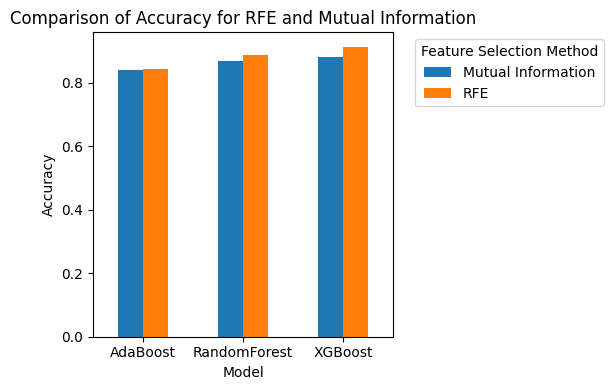

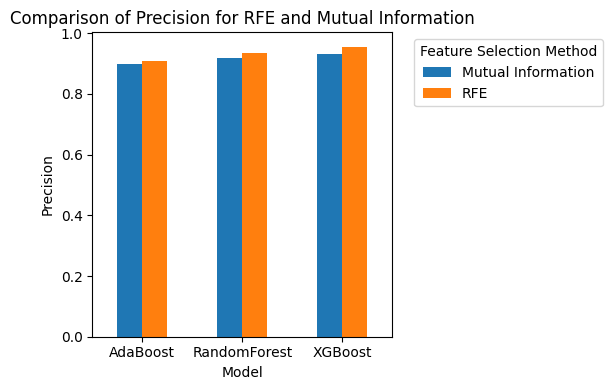

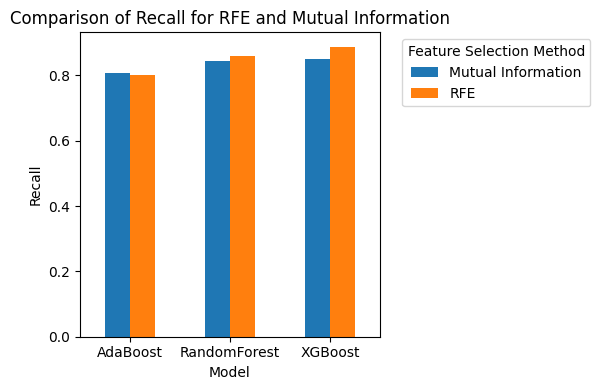

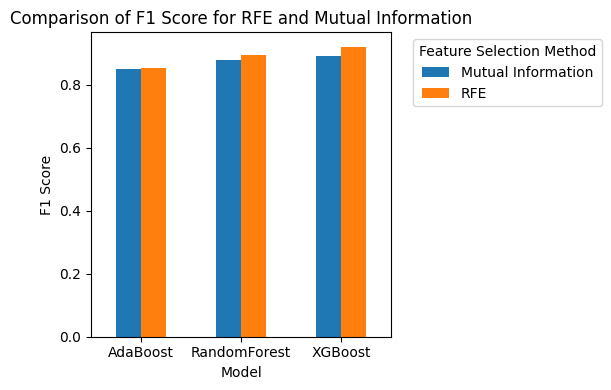

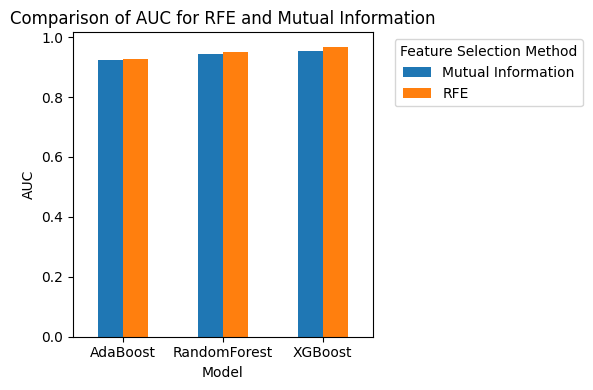

In [119]:
# List of metrics to plot
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]

# Loop through each metric and create a bar chart
for metric in metrics:
    plt.figure(figsize=(6, 4))
    metric_df = metrics_df.pivot(index="Model", columns="Feature Selection", values=metric)
    metric_df.plot(kind="bar", ax=plt.gca())

    plt.title(f"Comparison of {metric} for RFE and Mutual Information")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=0)
    plt.legend(title="Feature Selection Method", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

I will select the best model based on the highest recall because I consider the cost of incorrectly predicting defaulters to be higher than the cost of incorrectly predicting non-defaulters. Therefore, I am primarily concerned with my model accurately identifying positive cases, which is measured by recall.

In [120]:
# Find the best model based on recall
best_model_name = max(results, key=lambda k: results[k]["metrics"]["recall"])
best_model = results[best_model_name]["model"]
best_feature_selection = "RFE" if "RFE" in best_model_name else "MI"

print(f"\nBest model based on recall: {best_model_name}")
print(f"Best feature selection method: {best_feature_selection}")


Best model based on recall: XGBoost_RFE
Best feature selection method: RFE


I will evaluate the best model selected above on my test set

In [121]:
# Evaluate the best model on the test set
if best_feature_selection == "RFE":
    X_test_best = X_test_preprocessed[:, rfe_support]
else:
    X_test_best = X_test_preprocessed[:, mi_support]

# Predict the labels and probabilities for the test set
y_test_pred = best_model.predict(X_test_best)
y_test_pred_proba = best_model.predict_proba(X_test_best)[:, 1]

# Calculate performance metrics on the test set
test_accuracy = accuracy_score(y_test_cleaned, y_test_pred)
test_precision = precision_score(y_test_cleaned, y_test_pred)
test_recall = recall_score(y_test_cleaned, y_test_pred)
test_f1 = f1_score(y_test_cleaned, y_test_pred)
test_auc = roc_auc_score(y_test_cleaned, y_test_pred_proba)

# Print the performance of the best model on the test set
print("\nBest model performance on the test set:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"AUC: {test_auc:.4f}")


Best model performance on the test set:
Accuracy: 0.9105
Precision: 0.9577
Recall: 0.8822
F1 Score: 0.9184
AUC: 0.9657


Display a confusion matrix for the model prediction

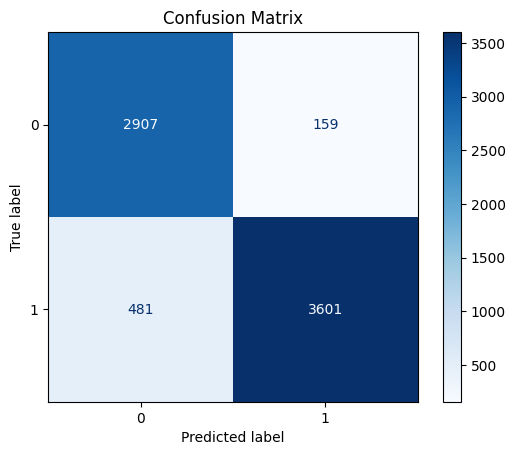

In [122]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_cleaned, y_test_pred)

# Create a confusion matrix display object and plot it
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')  # specify a color map for better visualization

# Customize and show the plot
plt.title("Confusion Matrix")
plt.show()